In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import urllib.request
from zipfile import ZipFile


Display the first few rows of the dataset
   Unnamed: 0  \
0           0   
1           1   
2           2   
3           3   
4           4   

   Week of the month (first week, second, third, fourth or fifth week  \
0                                                  1                    
1                                                  1                    
2                                                  1                    
3                                                  2                    
4                                                  2                    

   Day of the week (Monday to Friday)  Non-urgent order  Urgent order  \
0                                   4           316.307       223.270   
1                                   5           128.633        96.042   
2                                   6            43.651        84.375   
3                                   2           171.297       127.667   
4                                   3            90

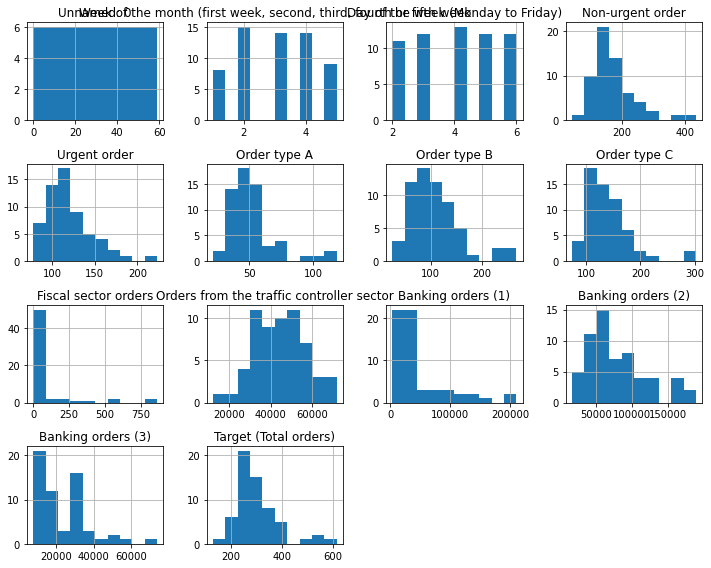

Data visualization - Correlation heatmap


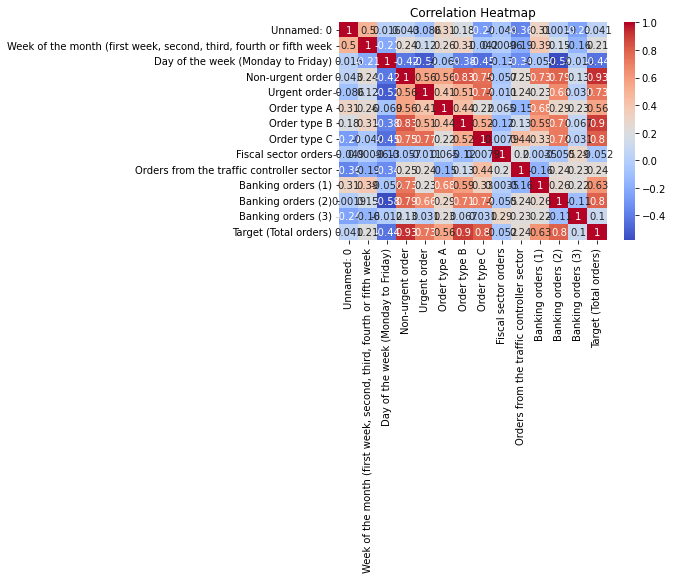

Assess skewness of the data
Unnamed: 0                                                            0.000000
Week of the month (first week, second, third, fourth or fifth week    0.017892
Day of the week (Monday to Friday)                                   -0.022888
Non-urgent order                                                      1.546244
Urgent order                                                          1.300066
Order type A                                                          1.724497
Order type B                                                          1.339496
Order type C                                                          1.728385
Fiscal sector orders                                                  3.146895
Orders from the traffic controller sector                             0.039353
Banking orders (1)                                                    2.043421
Banking orders (2)                                                    0.948538
Banking orders (3)      

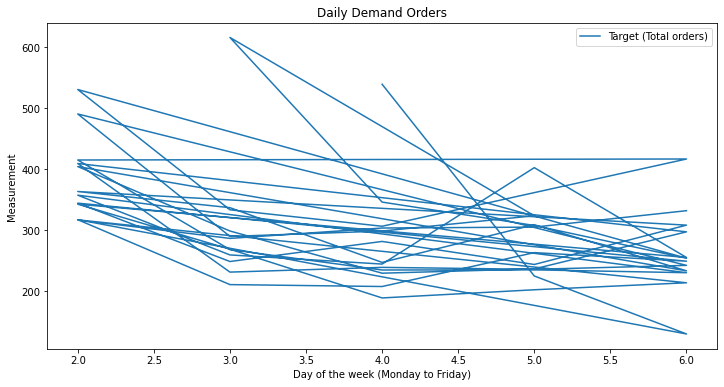

In [2]:
df = pd.read_csv('daily+demand+forecasting+orders.csv')

# Display the first few rows of the dataset
print("Display the first few rows of the dataset")
print(df.head())

# Summary statistics of the dataset
print("Summary statistics of the dataset")
print(df.describe())

# Check for missing values
print("Check for missing values")
print(df.isnull().sum())

# Data visualization - Histogram of each feature
print("Data visualization - Histogram of each feature")
df.hist(figsize=(10, 8))
plt.tight_layout()
plt.show()

# Data visualization - Correlation heatmap
print("Data visualization - Correlation heatmap")
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

# Assess skewness of the data
print("Assess skewness of the data")
skewness = df.skew()
print(skewness)

# Identify potential biases
# You can perform further analysis based on your specific research objectives and the features in the dataset.
# For example, you can compare the distribution of air quality measurements across different time periods, locations, or weather conditions.

# Time series analysis - Visualize the quality of change
df['Day of the week (Monday to Friday)'] = pd.to_numeric(df['Day of the week (Monday to Friday)'])
df['Target (Total orders)'] = pd.to_numeric(df['Target (Total orders)'])
df.plot(x="Day of the week (Monday to Friday)", y=["Target (Total orders)"], figsize=(12, 6))
plt.title("Daily Demand Orders")
plt.ylabel("Measurement")
plt.show()


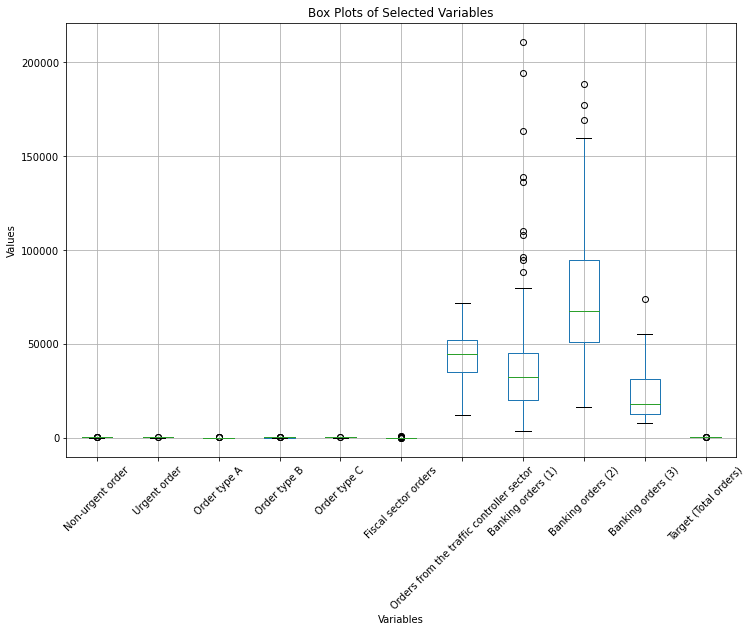

Outliers found in column: Non-urgent order
32    435.304
36    381.768
Name: Non-urgent order, dtype: float64
Number of outliers in column Non-urgent order: 2


Outliers found in column: Urgent order
0    223.27
Name: Urgent order, dtype: float64
Number of outliers in column Urgent order: 1


Outliers found in column: Order type A
36    118.178
39    109.888
Name: Order type A, dtype: float64
Number of outliers in column Order type A: 2


Outliers found in column: Order type B
32    267.342
Name: Order type B, dtype: float64
Number of outliers in column Order type B: 1


Outliers found in column: Order type C
0     302.448
32    281.227
Name: Order type C, dtype: float64
Number of outliers in column Order type C: 2


Outliers found in column: Fiscal sector orders
9     865.0
19    844.0
Name: Fiscal sector orders, dtype: float64
Number of outliers in column Fiscal sector orders: 2


No outliers found in column: Orders from the traffic controller sector
Number of outliers in column Orde

In [3]:
#IDENTIFY DATA OUTLIERS

# Select the columns that may contain outliers
columns_of_interest = ["Non-urgent order", "Urgent order", "Order type A", "Order type B", "Order type C", "Fiscal sector orders",
                       "Orders from the traffic controller sector", "Banking orders (1)", "Banking orders (2)", "Banking orders (3)", "Target (Total orders)"]

# Create box plots for each column to visualize outliers
plt.figure(figsize=(12, 8))
df[columns_of_interest].boxplot()
plt.xticks(rotation=45)
plt.title("Box Plots of Selected Variables")
plt.xlabel("Variables")
plt.ylabel("Values")
plt.show()

# Define the threshold for identifying outliers (you can adjust this based on your specific requirements)
outlier_threshold = 3  # Adjust this value as needed

# Iterate over each column and identify the outliers
for column in columns_of_interest:
    # Calculate the z-scores for each data point
    z_scores = (df[column] - df[column].mean()) / df[column].std()
    
    # Identify the outliers based on the z-scores exceeding the threshold
    outliers = df[abs(z_scores) > outlier_threshold][column]
    
    if outliers.empty:
        print(f"No outliers found in column: {column}")
    else:
        print(f"Outliers found in column: {column}")
        print(outliers)
        
    # Count the number of outliers in the column
    num_outliers = len(outliers)
    print(f"Number of outliers in column {column}: {num_outliers}")
    print("\n")

In [4]:
# Select the columns of interest (replace the column names as per your dataset)
columns_of_interest = ["Non-urgent order", "Urgent order", "Order type A", "Order type B", "Order type C", "Fiscal sector orders",
                       "Orders from the traffic controller sector", "Banking orders (1)", "Banking orders (2)", "Banking orders (3)", "Target (Total orders)"]

# Create a new DataFrame to store the relevancy scores
relevancy_scores = pd.DataFrame(columns=["Column", "RelevancyScore"])

# Iterate over each column and calculate the relevancy score
for column in columns_of_interest:
    # Calculate the z-scores for each data point
    z_scores = (df[column] - df[column].mean()) / df[column].std()

    # Identify the outliers based on the z-scores exceeding the threshold
    outliers = df[abs(z_scores) > outlier_threshold][column]

    # Calculate the relevancy score for the column
    relevancy_score = len(df[column]) - df[column].isnull().sum() - len(outliers)

    # Append the column name and relevancy score to the relevancy_scores DataFrame
    relevancy_scores = relevancy_scores.append({"Column": column, "RelevancyScore": relevancy_score}, ignore_index=True)

# Print the relevancy scores for each column
print("Relevancy Scores:")
print(relevancy_scores)

Relevancy Scores:
                                       Column RelevancyScore
0                            Non-urgent order             58
1                                Urgent order             59
2                                Order type A             58
3                                Order type B             59
4                                Order type C             58
5                        Fiscal sector orders             58
6   Orders from the traffic controller sector             60
7                          Banking orders (1)             58
8                          Banking orders (2)             60
9                          Banking orders (3)             59
10                      Target (Total orders)             59


In [5]:
# Create a new DataFrame to store the consistency scores
consistency_scores = pd.DataFrame(columns=["Column", "ConsistencyScore"])

# Iterate over each column and calculate the consistency score
for column in columns_of_interest:
    # Calculate the coefficient of variation (CV)
    cv = df[column].std() / df[column].mean()
    
    # Calculate the consistency score for the column (higher consistency -> lower CV)
    consistency_score = 1 - cv
    
    # Append the column name and consistency score to the consistency_scores DataFrame
    consistency_scores = consistency_scores.append({"Column": column, "ConsistencyScore": consistency_score}, ignore_index=True)

# Print the consistency scores for each column
print("Consistency Scores:")
print(consistency_scores)

Consistency Scores:
                                       Column  ConsistencyScore
0                            Non-urgent order          0.597196
1                                Urgent order          0.771521
2                                Order type A          0.638666
3                                Order type B          0.535462
4                                Order type C          0.702985
5                        Fiscal sector orders         -1.409713
6   Orders from the traffic controller sector          0.725917
7                          Banking orders (1)          0.030448
8                          Banking orders (2)          0.489878
9                          Banking orders (3)          0.431181
10                      Target (Total orders)          0.702193


In [6]:
# Select the columns of interest
columns_of_interest = ["Non-urgent order", "Urgent order", "Order type A", "Order type B", "Order type C", "Fiscal sector orders",
                       "Orders from the traffic controller sector", "Banking orders (1)", "Banking orders (2)", "Banking orders (3)", "Target (Total orders)"]

# Calculate the KPIs for data bias and skewed data
kpi_results = {}

for column in columns_of_interest:
    kpi_results[column] = {
        "Mean": df[column].mean(),
        "Median": df[column].median(),
        "Mode": df[column].mode()[0],
        "Skewness": df[column].skew(),
        "Range": df[column].max() - df[column].min(),
        "IQR": df[column].quantile(0.75) - df[column].quantile(0.25),
        "Variance": df[column].var(),
        "Standard Deviation": df[column].std()
    }

# Create a DataFrame from the KPI results
kpi_df = pd.DataFrame(kpi_results)

# Print the KPI results
print("KPI Results:")
print(kpi_df)

KPI Results:
                    Non-urgent order  Urgent order  Order type A  \
Mean                      172.554933    118.920850     52.112217   
Median                    151.062500    113.114500     47.166500   
Mode                       43.651000     77.371000     21.826000   
Skewness                    1.546244      1.300066      1.724497   
Range                     391.653000    145.899000     96.352000   
IQR                        69.258500     31.220250     19.007500   
Variance                 4831.054563    738.259356    354.565533   
Standard Deviation         69.505788     27.170929     18.829911   

                    Order type B  Order type C  Fiscal sector orders  \
Mean                  109.229850    139.531250             77.396133   
Median                 99.482000    127.990000              7.831500   
Mode                   25.125000     74.372000              0.000000   
Skewness                1.339496      1.728385              3.146895   
Range         

In [7]:
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA

# Assuming you have already loaded and preprocessed your time series data into the "df" DataFrame

# List of columns of interest for anomaly detection
columns_of_interest = ["Non-urgent order", "Urgent order", "Order type A", "Order type B", "Order type C", "Fiscal sector orders",
                       "Orders from the traffic controller sector", "Banking orders (1)", "Banking orders (2)", "Banking orders (3)", "Target (Total orders)"]

# Prompt the user to choose a column
print("Available columns:")
for i, col in enumerate(columns_of_interest):
    print(f"{i+1}. {col}")
choice = input("Choose a column number to detect anomalies: ")

try:
    # Convert the choice to integer and get the selected column name
    column_index = int(choice) - 1
    selected_column = columns_of_interest[column_index]
    
    # Create the ARIMA model
    model = ARIMA(df[selected_column], order=(1, 1, 1))
    
    # Fit the model
    model_fit = model.fit()
    
    # Get the predicted values and residuals
    predictions = model_fit.predict()
    residuals = df[selected_column] - predictions
    
    # Calculate the mean and standard deviation of the residuals
    mean = np.mean(residuals)
    std = np.std(residuals)
    
    # Set a threshold for anomaly detection (e.g., 3 standard deviations from the mean)
    threshold = 3 * std
    
    # Detect anomalies by comparing the absolute residuals to the threshold
    anomalies = np.abs(residuals) > threshold
    
    # Print the indices of the detected anomalies
    print("Detected anomalies:")
    print(df.index[anomalies])
    
except (ValueError, IndexError):
    print("Invalid choice. Please choose a valid column number.")


Available columns:
1. Non-urgent order
2. Urgent order
3. Order type A
4. Order type B
5. Order type C
6. Fiscal sector orders
7. Orders from the traffic controller sector
8. Banking orders (1)
9. Banking orders (2)
10. Banking orders (3)
11. Target (Total orders)
Detected anomalies:
Int64Index([0], dtype='int64')


Available columns:
1. Non-urgent order
2. Urgent order
3. Order type A
4. Order type B
5. Order type C
6. Fiscal sector orders
7. Orders from the traffic controller sector
8. Banking orders (1)
9. Banking orders (2)
10. Banking orders (3)
11. Target (Total orders)


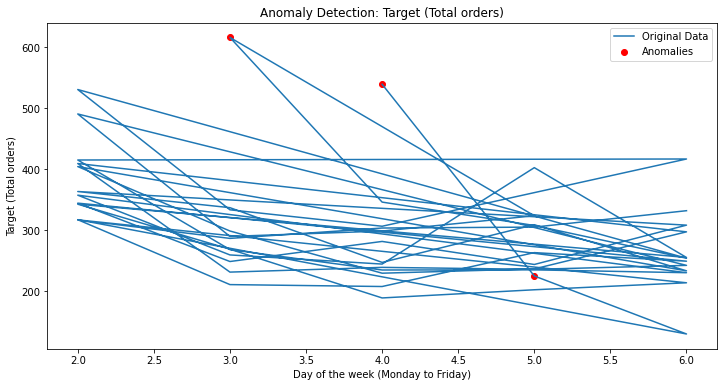

Detected anomalies:
    Target (Total orders)
0                       1
1                       1
32                      1
Detected skewed data points:
    Target (Total orders)  Skewed Data
0                       1            1
1                       1            1
2                       0            1
3                       0            1
4                       0            1
5                       0            1
6                       0            1
7                       0            1
8                       0            1
9                       0            1
10                      0            1
11                      0            1
12                      0            1
13                      0            1
14                      0            1
15                      0            1
16                      0            1
17                      0            1
18                      0            1
19                      0            1
20                      0   

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# Assuming you have already loaded and preprocessed your time series data into the "df" DataFrame

# List of columns of interest for anomaly detection
columns_of_interest = ["Non-urgent order", "Urgent order", "Order type A", "Order type B", "Order type C", "Fiscal sector orders",
                       "Orders from the traffic controller sector", "Banking orders (1)", "Banking orders (2)", "Banking orders (3)", "Target (Total orders)"]

# Prompt the user to choose columns
print("Available columns:")
for i, col in enumerate(columns_of_interest):
    print(f"{i+1}. {col}")
choice = input("Choose column numbers (comma-separated) to detect anomalies: ")

try:
    # Convert the choices to a list of column indices
    column_indices = [int(x.strip()) - 1 for x in choice.split(",")]

    # Create an empty DataFrame to store the anomalies
    anomalies_df = pd.DataFrame(index=df.index)

    for index in column_indices:
        if index < 0 or index >= len(columns_of_interest):
            continue

        # Get the selected column name
        selected_column = columns_of_interest[index]

        # Create the ARIMA model
        model = ARIMA(df[selected_column], order=(1, 1, 1))

        # Fit the model
        model_fit = model.fit()

        # Get the predicted values and residuals
        predictions = model_fit.predict()
        residuals = df[selected_column] - predictions

        # Calculate the mean and standard deviation of the residuals
        mean = np.mean(residuals)
        std = np.std(residuals)

        # Set a threshold for anomaly detection (e.g., 3 standard deviations from the mean)
        threshold = 2 * std

        # Detect anomalies by comparing the absolute residuals to the threshold
        anomalies = np.abs(residuals) > threshold

        # Add the anomalies to the anomalies DataFrame
        anomalies_df[selected_column] = anomalies.astype(int)

        # Plot the time series data with detected anomalies
        plt.figure(figsize=(12, 6))
        plt.plot(df["Day of the week (Monday to Friday)"], df[selected_column], label="Original Data")
        plt.scatter(df["Day of the week (Monday to Friday)"][anomalies], df[selected_column][anomalies], color='red', label="Anomalies")
        plt.xlabel("Day of the week (Monday to Friday)")
        plt.ylabel(selected_column)
        plt.title(f"Anomaly Detection: {selected_column}")
        plt.legend()
        plt.show()

    # Print the detected anomalies
    print("Detected anomalies:")
    print(anomalies_df.loc[anomalies_df.any(axis=1)])

except (ValueError, IndexError):
    print("Invalid choices. Please choose valid column numbers.")


# Calculate the skewness of the residuals
residual_skewness = residuals.skew()

# Set a threshold for skewness
skewness_threshold = 1.0  # Adjust this threshold based on your data and requirements

# Detect skewed data points by comparing the absolute skewness to the threshold
skewed_data_points = np.abs(residual_skewness) > skewness_threshold

# Add the detected skewed data points to the anomalies DataFrame
anomalies_df["Skewed Data"] = skewed_data_points.astype(int)

# Print the detected skewed data points
print("Detected skewed data points:")
print(anomalies_df.loc[anomalies_df["Skewed Data"] == 1])

